In [51]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from fc_net import *
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline


def evaluate(costs, accuracy):
    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(accuracy)
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('iteration (x100)')

    # plot loss
    axes[1].plot(costs)
    axes[1].set_title('model cost')
    axes[1].set_ylabel('cost')
    axes[1].set_xlabel('iteration (x100)')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# load data set
np.random.seed(42)
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [53]:
### print shapes
print(f"x_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}\n")
print(f"x_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}\n")

### print claess
print("classes = ", list(np.unique(y_train)))

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)

x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)

classes =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [54]:
def one_hot_y(y):
    ohe = OneHotEncoder(categories=[range(10)], sparse=False)
    return ohe.fit_transform(y.reshape(-1,1))

def assert_one_hot(y, y_ohe):
    for label, encoded_label in zip(y, y_ohe):
        assert label == np.flatnonzero(encoded_label)[0]
        
y_train_encoded, y_test_encoded,  = one_hot_y(y_train), one_hot_y(y_test)
assert_one_hot(y_train, y_train_encoded)
assert_one_hot(y_test, y_test_encoded)

# reshaping Xs
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print(f"x_train.shape = {X_train.shape}")
print(f"y_train_encoded.shape = {y_train_encoded.shape}\n")
print(f"x_test.shape = {X_test.shape}")
print(f"y_test_encoded.shape = {y_test_encoded.shape}\n")


x_train.shape = (60000, 784)
y_train_encoded.shape = (60000, 10)

x_test.shape = (10000, 784)
y_test_encoded.shape = (10000, 10)



In [55]:
## for testing
# X, y = next(next_batch(X_train, y_test_encoded, 32))
# print(f"X.shape = {X.shape}")
# print(f"y.shape = {y.shape}\n")

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
hidden_layers_dims = [20,7,5,10]


c:\users\galb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\galb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\galb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\galb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
%time no_bn_no_do = L_layer_model(X_train, y_train_encoded, hidden_layers_dims, learning_rate=0.009, batch_size=64, use_batchnorm=False, dropout=1, num_iterations=9000000, min_epochs=40)


iteration step: 100 | cost: 2.006263088144477
iteration step: 200 | cost: 1.827842478038004
iteration step: 300 | cost: 1.8624664753188995
iteration step: 400 | cost: 1.423738265988204
iteration step: 500 | cost: 1.2321131445877724
iteration step: 600 | cost: 1.083052239832362
iteration step: 700 | cost: 0.8812096458688731
iteration step: 800 | cost: 1.0912287970171723
iteration step: 900 | cost: 0.801929604011948
iteration step: 1000 | cost: 0.9351355294298458
iteration step: 1100 | cost: 0.897763295247118
iteration step: 1200 | cost: 0.6621355679109495
iteration step: 1300 | cost: 0.5437082054764768
iteration step: 1400 | cost: 0.5334486992188198
iteration step: 1500 | cost: 0.6288236846778241
iteration step: 1600 | cost: 0.340275548524577
iteration step: 1700 | cost: 0.46997316392561883
iteration step: 1800 | cost: 0.6944330328266348
iteration step: 1900 | cost: 0.41862506540421784
iteration step: 2000 | cost: 0.2821351357342985
iteration step: 2100 | cost: 0.41771605190966876
itera

iteration step: 16900 | cost: 0.07028428168902784
iteration step: 17000 | cost: 0.08306539819036717
iteration step: 17100 | cost: 0.23166450127456134
iteration step: 17200 | cost: 0.2541160710941496
iteration step: 17300 | cost: 0.15781672297028648
iteration step: 17400 | cost: 0.20144806464640552
iteration step: 17500 | cost: 0.10207975844154338
iteration step: 17600 | cost: 0.11186681641861643
iteration step: 17700 | cost: 0.1425744392658964
iteration step: 17800 | cost: 0.11117406797112644
iteration step: 17900 | cost: 0.1031303616159733
iteration step: 18000 | cost: 0.08339479230175283
iteration step: 18100 | cost: 0.02168419175543658
iteration step: 18200 | cost: 0.07725485337813678
iteration step: 18300 | cost: 0.07119355147373557
iteration step: 18400 | cost: 0.06733179304526585
iteration step: 18500 | cost: 0.08771496980308272
iteration step: 18600 | cost: 0.23405882529646319
iteration step: 18700 | cost: 0.2503526913667842
iteration step: 18800 | cost: 0.14957063576193586
iter

In [58]:
params, costs, accs, train_last_acc, val_last_acc = no_bn_no_do

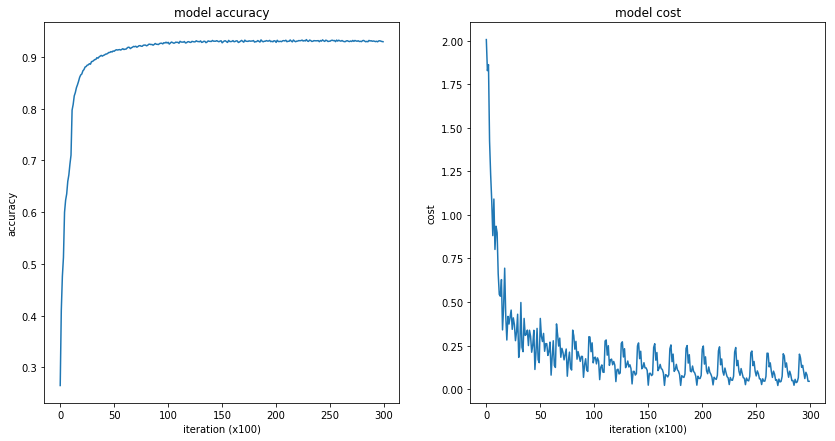

In [59]:
evaluate(costs, accs)

In [60]:
test_acc = predict(X_test, y_test_encoded, params, False)
print('Train accuracy: {}\nValidation accuracy: {}\nTest accuracy: {}'.format(train_last_acc, val_last_acc, test_acc))

Train accuracy: 0.9693958333333333
Validation accuracy: 0.9295
Test accuracy: 0.9323


In [61]:
%time yes_bn_no_do = L_layer_model(X_train, y_train_encoded, hidden_layers_dims, learning_rate=0.009, batch_size=64, use_batchnorm=True, dropout=1, num_iterations=9000000, min_epochs=40)



iteration step: 100 | cost: 1.9510667036654368
iteration step: 200 | cost: 1.8153419705395835
iteration step: 300 | cost: 1.7306181722341434
iteration step: 400 | cost: 1.5314122922579152
iteration step: 500 | cost: 1.462191793891681
iteration step: 600 | cost: 1.4905072181313477
iteration step: 700 | cost: 1.5086313292073585
iteration step: 800 | cost: 1.3187824517186928
iteration step: 900 | cost: 1.422962396718077
iteration step: 1000 | cost: 1.2262498186411908
iteration step: 1100 | cost: 1.268350877903752
iteration step: 1200 | cost: 1.222133393853778
iteration step: 1300 | cost: 0.8773557416549815
iteration step: 1400 | cost: 1.0407525578989025
iteration step: 1500 | cost: 1.189190961616576
iteration step: 1600 | cost: 0.9475667307864162
iteration step: 1700 | cost: 1.0623726039008075
iteration step: 1800 | cost: 0.9418646416202181
iteration step: 1900 | cost: 0.7268659038256733
iteration step: 2000 | cost: 0.8596409446815142
iteration step: 2100 | cost: 0.8516527404596842
iterat

iteration step: 17000 | cost: 0.16071887792356299
iteration step: 17100 | cost: 0.3301279468752776
iteration step: 17200 | cost: 0.3515398448625127
iteration step: 17300 | cost: 0.27476349146718354
iteration step: 17400 | cost: 0.3202501226436344
iteration step: 17500 | cost: 0.2709145950525942
iteration step: 17600 | cost: 0.2725817267449886
iteration step: 17700 | cost: 0.19090379389187126
iteration step: 17800 | cost: 0.1510168416604513
iteration step: 17900 | cost: 0.17234311960170978
iteration step: 18000 | cost: 0.3822990343581093
iteration step: 18100 | cost: 0.1660453267455363
iteration step: 18200 | cost: 0.21599909070754036
iteration step: 18300 | cost: 0.29709335350283095
iteration step: 18400 | cost: 0.16938754934201605
iteration step: 18500 | cost: 0.15083344488901174
iteration step: 18600 | cost: 0.3054768081413595
iteration step: 18700 | cost: 0.32688001877593587
iteration step: 18800 | cost: 0.2645792759256641
iteration step: 18900 | cost: 0.2991213430350501
iteration s

In [62]:
params, costs, accs, train_last_acc, val_last_acc = yes_bn_no_do

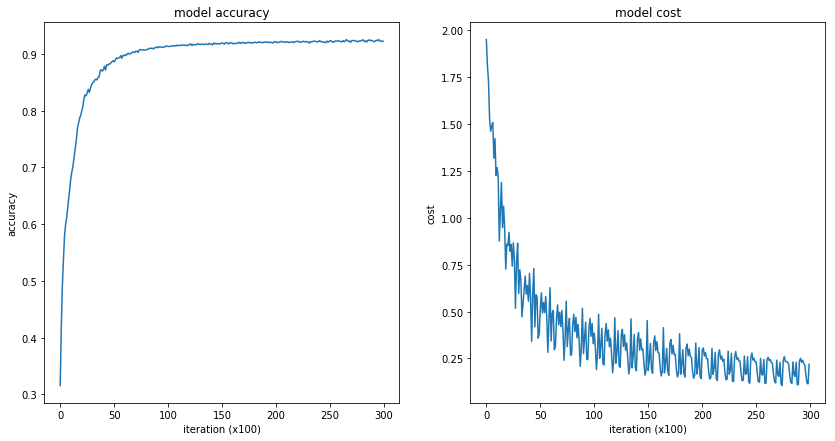

In [63]:
evaluate(costs, accs)

In [64]:
test_acc = predict(X_test, y_test_encoded, params, True)
print('Train accuracy: {}\nValidation accuracy: {}\nTest accuracy: {}'.format(train_last_acc, val_last_acc, test_acc))

Train accuracy: 0.9478958333333334
Validation accuracy: 0.9223333333333333
Test accuracy: 0.9263


In [65]:
%time no_bn_yes_do = L_layer_model(X_train, y_train_encoded, hidden_layers_dims, learning_rate=0.009, batch_size=64, use_batchnorm=False, dropout=0.7, num_iterations=9000000, min_epochs=40)


iteration step: 100 | cost: 2.238585469885022
iteration step: 200 | cost: 2.3199254818598853
iteration step: 300 | cost: 2.191707802481632
iteration step: 400 | cost: 2.2556008118239697
iteration step: 500 | cost: 2.3070062785832937
iteration step: 600 | cost: 2.2250581764229134
iteration step: 700 | cost: 2.1573364152761654
iteration step: 800 | cost: 2.1963543855239367
iteration step: 900 | cost: 2.109389511076823
iteration step: 1000 | cost: 2.0294454846656427
iteration step: 1100 | cost: 2.2684124521408187
iteration step: 1200 | cost: 1.9891710664360298
iteration step: 1300 | cost: 2.0159004449186995
iteration step: 1400 | cost: 2.0702179334844013
iteration step: 1500 | cost: 2.121514191115921
iteration step: 1600 | cost: 2.0449280375567795
iteration step: 1700 | cost: 1.990223752086739
iteration step: 1800 | cost: 2.08609508327047
iteration step: 1900 | cost: 1.951480292493611
iteration step: 2000 | cost: 1.8807633472993295
iteration step: 2100 | cost: 2.0243178532840425
iteration

iteration step: 17200 | cost: 1.6830473313199683
iteration step: 17300 | cost: 1.4836457029976096
iteration step: 17400 | cost: 1.5503256895208242
iteration step: 17500 | cost: 1.9597891706683768
iteration step: 17600 | cost: 1.647334789119716
iteration step: 17700 | cost: 1.5299253976914327
iteration step: 17800 | cost: 1.6271068884348105
iteration step: 17900 | cost: 1.6550146211557757
iteration step: 18000 | cost: 1.827355482603779
iteration step: 18100 | cost: 1.5496764683152056
iteration step: 18200 | cost: 1.5625897910794242
iteration step: 18300 | cost: 1.6288082925659644
iteration step: 18400 | cost: 1.6761125828652408
iteration step: 18500 | cost: 1.6071227385280349
iteration step: 18600 | cost: 1.625310805702185
iteration step: 18700 | cost: 1.5896785991872493
iteration step: 18800 | cost: 1.5800831205803856
iteration step: 18900 | cost: 1.5888973767551664
iteration step: 19000 | cost: 1.8184719711875252
iteration step: 19100 | cost: 1.5623549730343624
iteration step: 19200 |

In [66]:
params, costs, accs, train_last_acc, val_last_acc = no_bn_yes_do

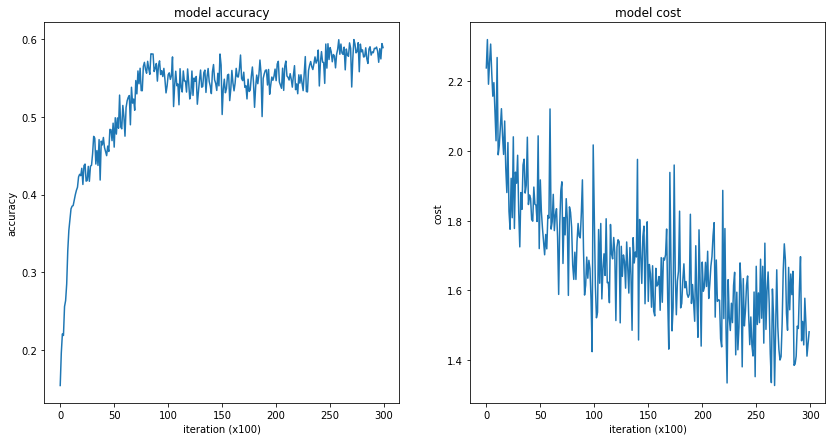

In [67]:
evaluate(costs, accs)

In [68]:
test_acc = predict(X_test, y_test_encoded, params, False)
print('Train accuracy: {}\nValidation accuracy: {}\nTest accuracy: {}'.format(train_last_acc, val_last_acc, test_acc))

Train accuracy: 0.5909791666666667
Validation accuracy: 0.58925
Test accuracy: 0.5881
